In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#For Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For finding accuracy
from sklearn.metrics import accuracy_score

#For KNN(K-Nearest Neighbor)
from sklearn.neighbors import KNeighborsClassifier

#For Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For SVM(Support vector Machine)
from sklearn.svm import SVC

#For precision & recall score
from sklearn.metrics import precision_score, recall_score

#For confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#Importing Dataset
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Dataset/All_Pokemon.csv"
dataset = pd.read_csv(path)
dataset.head(3)

Mounted at /content/drive


,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0


In [ ]:
#Checking Initial Dimension
dataset.shape

(1032, 44)

In [ ]:
#Deleting categorical value features
dataset_2 = dataset.drop(['Name','Type 1', 'Type 2', 'Abilities', 'Experience type'], axis = 1)
dataset_2.head(3)

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,45,49,49,65,65,45,318,53.0,8.640988,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,60,62,63,80,80,60,405,67.5,8.902247,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,80,82,83,100,100,80,525,87.5,8.902247,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0


In [ ]:
#Deleting Unnecessary features
final_dataset = dataset_2.drop(['Number', 'Mean', 'Generation', 'Experience to level 100', 'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy' ,'Height','Weight', 'BMI'], axis = 1)

final_dataset.head(3)

,HP,Att,Def,Spa,Spd,Spe,BST,Standard Deviation,Final Evolution
0,45,49,49,65,65,45,318,8.640988,0.0
1,60,62,63,80,80,60,405,8.902247,0.0
2,80,82,83,100,100,80,525,8.902247,1.0


In [ ]:
#Checking if null values still exist
final_dataset.isnull().sum()

HP                    0
Att                   0
Def                   0
Spa                   0
Spd                   0
Spe                   0
BST                   0
Standard Deviation    0
Final Evolution       0
dtype: int64

In [ ]:
#Dimension of final dataset
final_dataset.shape

(1032, 9)

In [ ]:
#Checking Correlation between Input-Output Features

dataset_corr = final_dataset.corr()

dataset_corr

,HP,Att,Def,Spa,Spd,Spe,BST,Standard Deviation,Final Evolution
HP,1.000000,0.448109,0.270759,0.367900,0.364979,0.182416,0.636355,0.319102,0.524300
Att,0.448109,1.000000,0.462794,0.368953,0.272079,0.375853,0.742052,0.338257,0.548398
Def,0.270759,0.462794,1.000000,0.220302,0.528080,-0.005132,0.619106,0.449801,0.476796
Spa,0.367900,0.368953,0.220302,1.000000,0.514828,0.443517,0.736265,0.203043,0.544006
Spd,0.364979,0.272079,0.528080,0.514828,1.000000,0.219159,0.711452,0.345154,0.580761
Spe,0.182416,0.375853,-0.005132,0.443517,0.219159,1.000000,0.560673,0.049156,0.441462
BST,0.636355,0.742052,0.619106,0.736265,0.711452,0.560673,1.000000,0.422135,0.775027
Standard Deviation,0.319102,0.338257,0.449801,0.203043,0.345154,0.049156,0.422135,1.000000,0.337684
Final Evolution,0.524300,0.548398,0.476796,0.544006,0.580761,0.441462,0.775027,0.337684,1.000000


<Axes: >

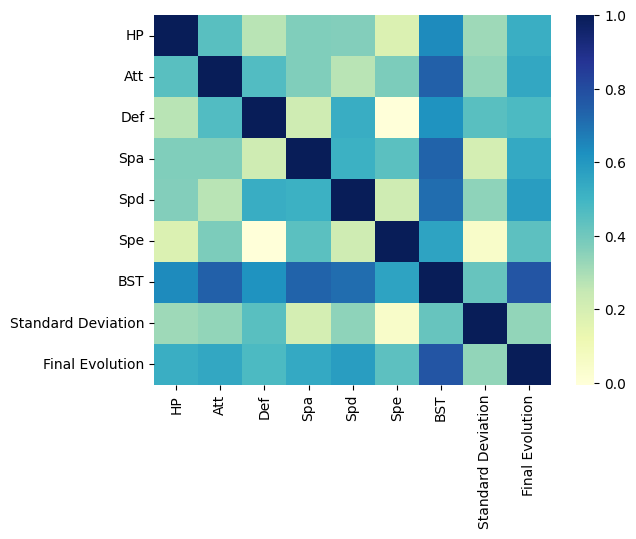

In [ ]:
#Graphical Representation of Correlation between Input-Output Features
sns.heatmap(dataset_corr, cmap = 'YlGnBu')

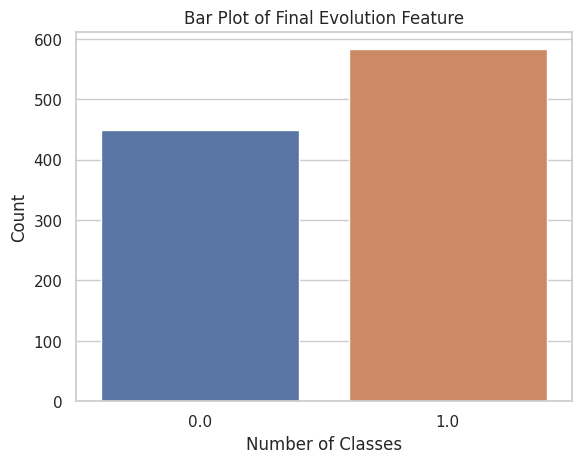

In [ ]:
#Barplot of the classes of Output Feature(Final Evolution)

sns.set(style="whitegrid")
sns.countplot(x='Final Evolution', data=final_dataset)


# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Count')
plt.title('Bar Plot of Final Evolution Feature')

# Show the plot
plt.show()

In [ ]:
#Using Pandas Dataframe Structure and initiating dictionaries for storing scores
df = pd.DataFrame(final_dataset)
model_accuracy = {'model':[], 'accuracy':[]}
model_precision = {'model':[], 'precision':[]}
model_recall = {'model':[], 'recall':[]}
model_f1 = {'model':[], 'f1':[]}

In [ ]:
#Specifying Input Features & Output/Target Feature
x = df[['HP', 'Att', 'Def', 'Spa', 'Spd','Spe', 'BST','Standard Deviation']]
y = df['Final Evolution']

In [ ]:
#Splitting Data(Random with 70/30)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, random_state = 8, train_size = 0.7)

In [ ]:
#Splitting Data(Stratified with 70/30)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, stratify = y, train_size = 0.7)

In [ ]:
#Feature Scaling Using MinMax Scaler-Random Split
scaler = MinMaxScaler()
scaler.fit(x_train_1)

x_train_scaled_minmax_random = scaler.transform(x_train_1)
x_test_scaled_minmax_random = scaler.transform(x_test_1)

In [ ]:
#Feature Scaling Using Standard Scaler-Random Split
scaler = StandardScaler()
scaler.fit(x_train_1)

x_train_scaled_standard_random = scaler.transform(x_train_1)
x_test_scaled_standard_random = scaler.transform(x_test_1)

In [ ]:
#Feature Scaling Using MinMax Scaler-Stratified Split
scaler = MinMaxScaler()
scaler.fit(x_train_2)

x_train_scaled_minmax_strafied = scaler.transform(x_train_2)
x_test_scaled_minmax_strafied = scaler.transform(x_test_2)

In [ ]:
#Feature Scaling Using Standard Scaler-Stratified Split
scaler = StandardScaler()
scaler.fit(x_train_2)

x_train_scaled_standard_strafied = scaler.transform(x_train_2)
x_test_scaled_standard_strafied = scaler.transform(x_test_2)

In [ ]:
#Initiating dictionary to store target prediction values
prediction_y = {}

In [ ]:
#KNN for MinMax Scaler-Random Split with accuracy, precision, recall & f1 score
knn = KNeighborsClassifier()

knn.fit(x_train_scaled_minmax_random, y_train_1)
y_pred = knn.predict(x_test_scaled_minmax_random)

score = accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['KNN-MinMmax-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.939
Precision accuracy: 0.932
Recall accuracy: 0.959
f-1 score: 0.946


In [ ]:
#Storing Scores
model_accuracy['model'].append('KNN-MinMmax-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('KNN-MinMmax-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('KNN-MinMmax-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('KNN-MinMmax-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#KNN for Standard Scaler-Random Split with accuracy, precision, recall & f1 score
knn = KNeighborsClassifier()

knn.fit(x_train_scaled_standard_random, y_train_1)
y_pred = knn.predict(x_test_scaled_standard_random)

score = accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['KNN-Standard-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.929
Precision accuracy: 0.921
Recall accuracy: 0.953
f-1 score: 0.937


In [ ]:
#Storing Scores
model_accuracy['model'].append('KNN-Standard-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('KNN-Standard-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('KNN-Standard-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('KNN-Standard-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#KNN for MinMax Scaler-Stratified Split with accuracy, precision, recall & f1 score
knn=KNeighborsClassifier()

knn.fit(x_train_scaled_minmax_strafied, y_train_2)
y_pred = knn.predict(x_test_scaled_minmax_strafied)

score=accuracy_score(y_pred,y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['KNN-MinMmax-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.913
Precision accuracy: 0.920
Recall accuracy: 0.926
f-1 score: 0.923


In [ ]:
#Storing Scores
model_accuracy['model'].append('KNN-MinMmax-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('KNN-MinMmax-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('KNN-MinMmax-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('KNN-MinMmax-Stratified')
model_f1['f1'].append(f1_score)

In [ ]:
#KNN for Standard Scaler-Stratified Split with accuracy, precision, recall & f1 score
knn = KNeighborsClassifier()

knn.fit(x_train_scaled_standard_strafied, y_train_2)
y_pred = knn.predict(x_test_scaled_standard_strafied)

score = accuracy_score(y_pred, y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['KNN-Standard-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.910
Precision accuracy: 0.915
Recall accuracy: 0.926
f-1 score: 0.920


In [ ]:
#Storing Scores
model_accuracy['model'].append('KNN-Standard-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('KNN-Standard-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('KNN-Standard-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('KNN-Standard-Stratified')
model_f1['f1'].append(f1_score)

In [ ]:
#Decision Tree for MinMax Scaler-Random Split with accuracy, precision, recall & f1 score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train_scaled_minmax_random, y_train_1)
y_pred = clf.predict(x_test_scaled_minmax_random)

score=accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['DecisionTree-MinMmax-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.877
Precision accuracy: 0.881
Recall accuracy: 0.901
f-1 score: 0.891


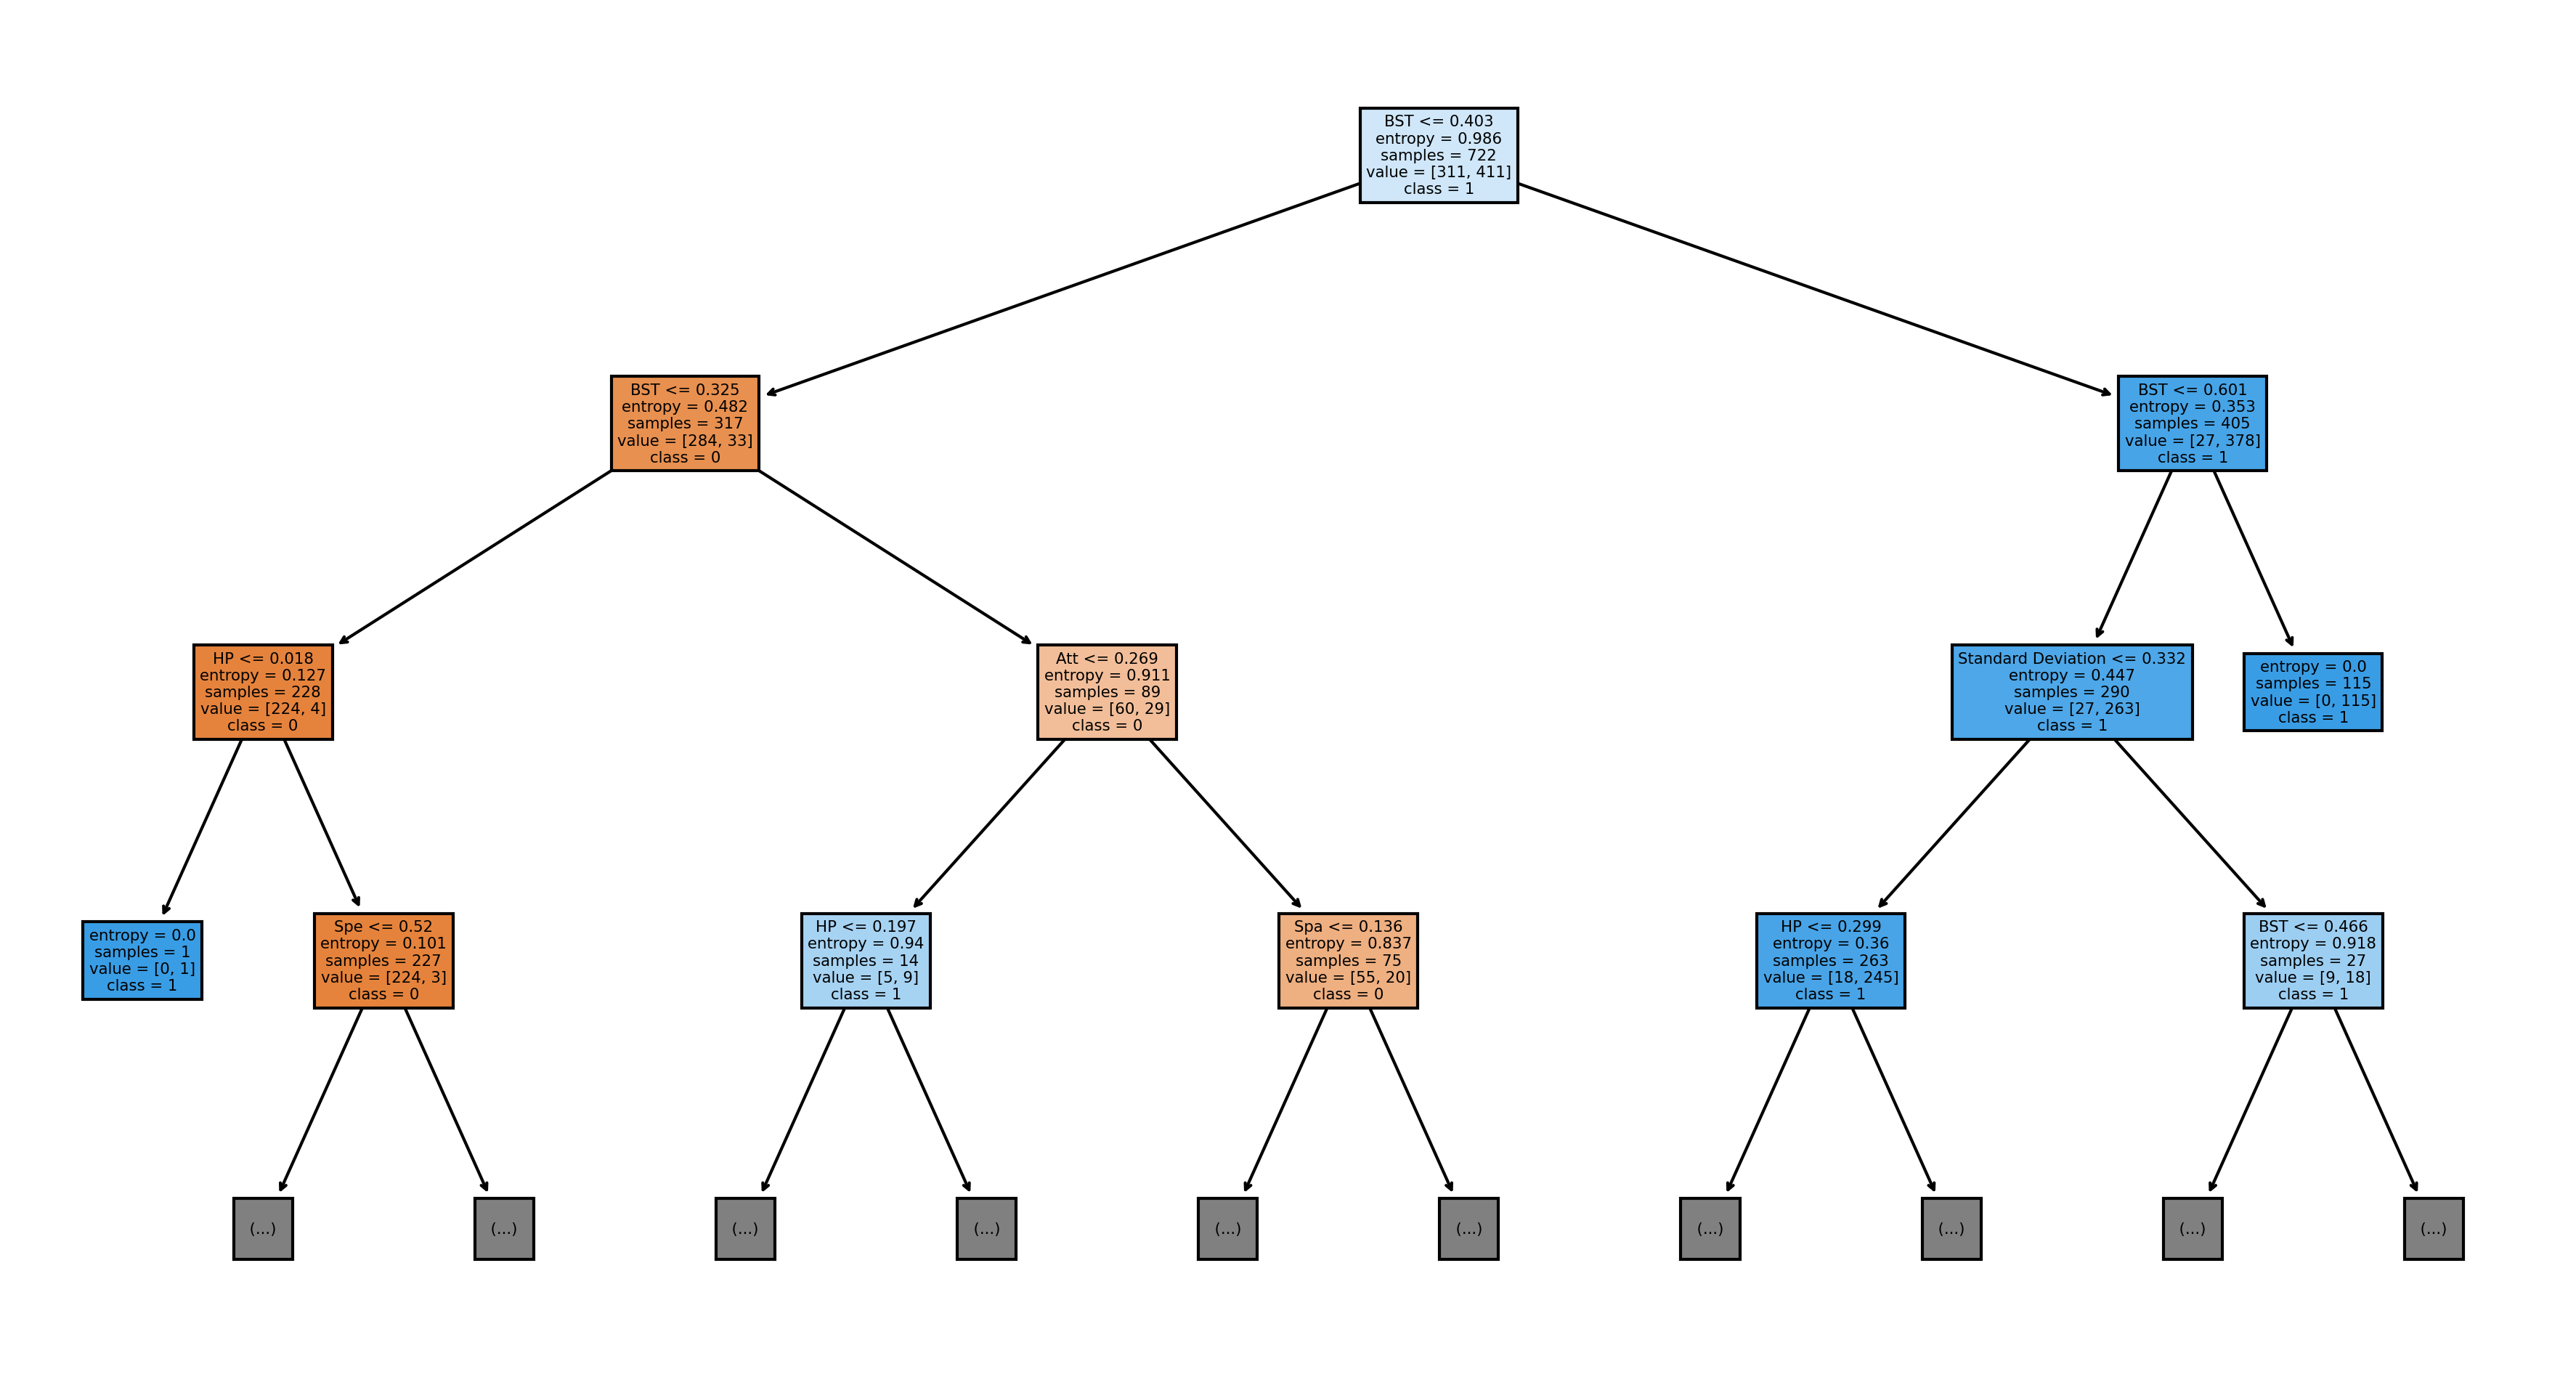

In [ ]:
#Plotting Decision Tree for MinMax Scaler-Random Split
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=['0','1'],
               filled = True, max_depth = 3);

In [ ]:
#Storing Scores
model_accuracy['model'].append('DecisionTree-MinMmax-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('DecisionTree-MinMmax-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('DecisionTree-MinMmax-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('DecisionTree-MinMmax-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#Decision Tree for Standard Scaler-Random Split with accuracy, precision, recall & f1 score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train_scaled_standard_random, y_train_1)
y_pred = clf.predict(x_test_scaled_standard_random)

score=accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['DecisionTree-Standard-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.877
Precision accuracy: 0.881
Recall accuracy: 0.901
f-1 score: 0.891


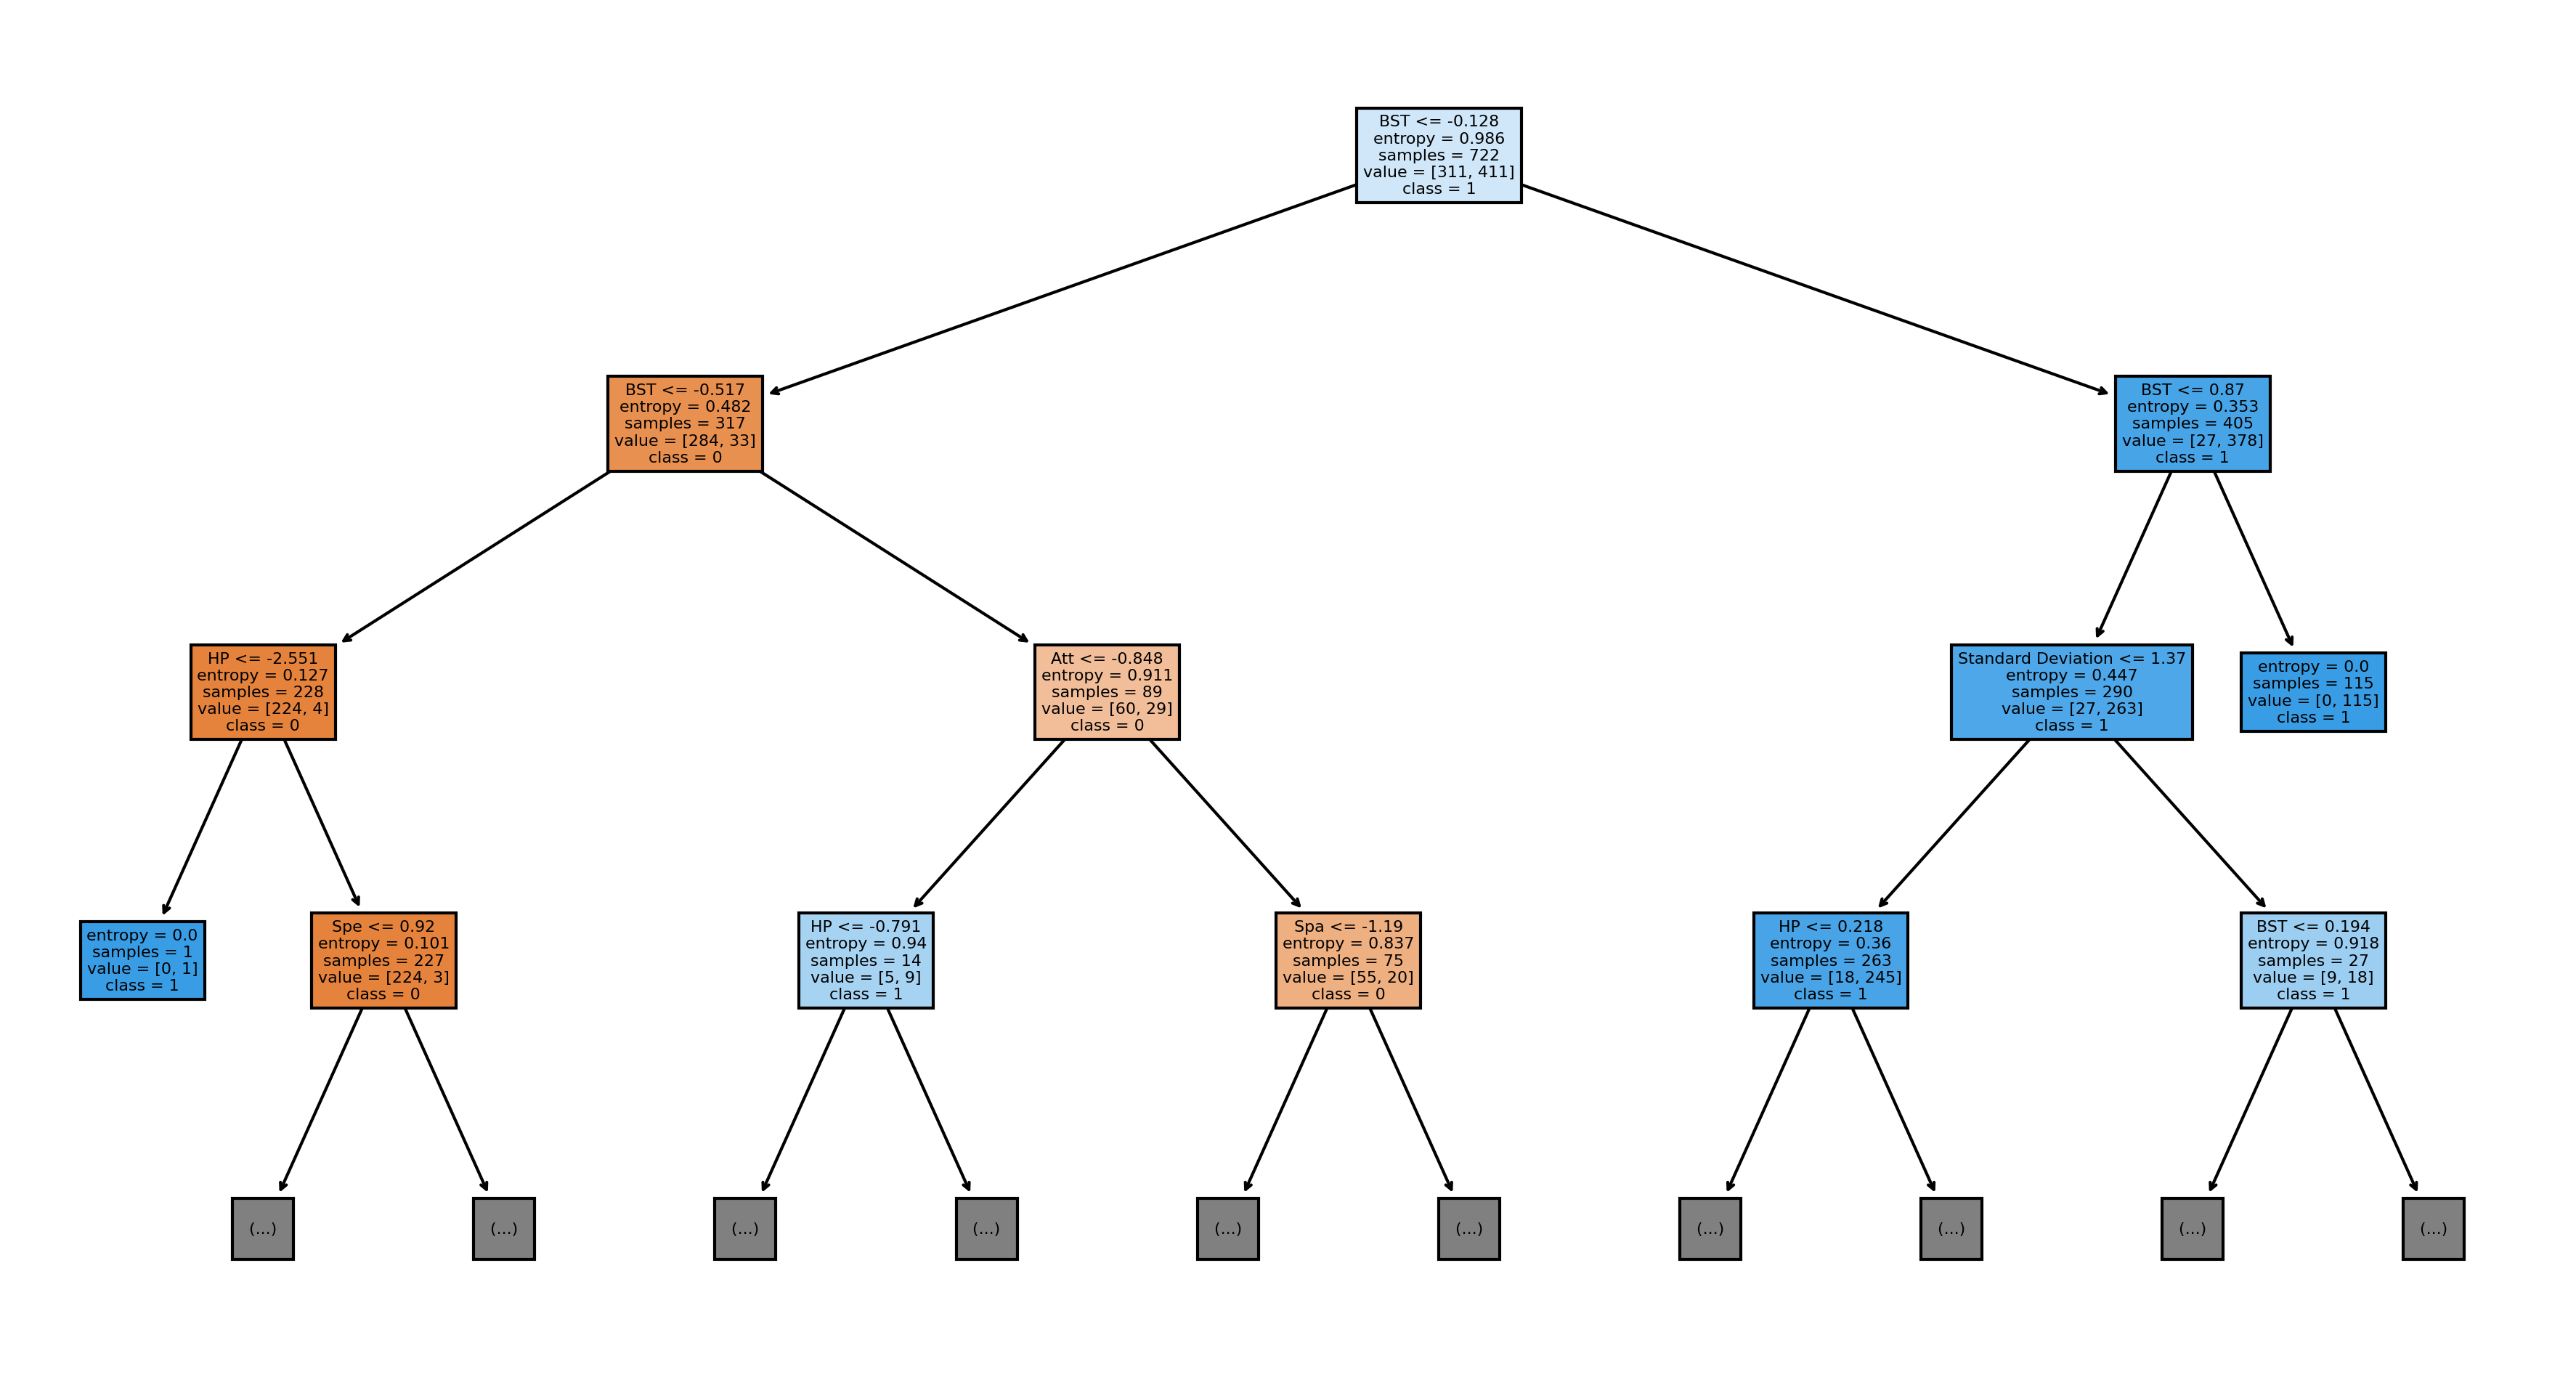

In [ ]:
#Plotting Decision Tree for Standard Scaler-Random Split
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=['0','1'],
               filled = True, max_depth = 3);

In [ ]:
#Storing Scores
model_accuracy['model'].append('DecisionTree-Standard-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('DecisionTree-Standard-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('DecisionTree-Standard-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('DecisionTree-Standard-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#Decision Tree for MinMax Scaler-Stratified Split with accuracy, precision, recall & f1 score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train_scaled_minmax_strafied, y_train_2)
y_pred = clf.predict(x_test_scaled_minmax_strafied)

score=accuracy_score(y_pred,y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['DecisionTree-MinMmax-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.877
Precision accuracy: 0.905
Recall accuracy: 0.874
f-1 score: 0.890


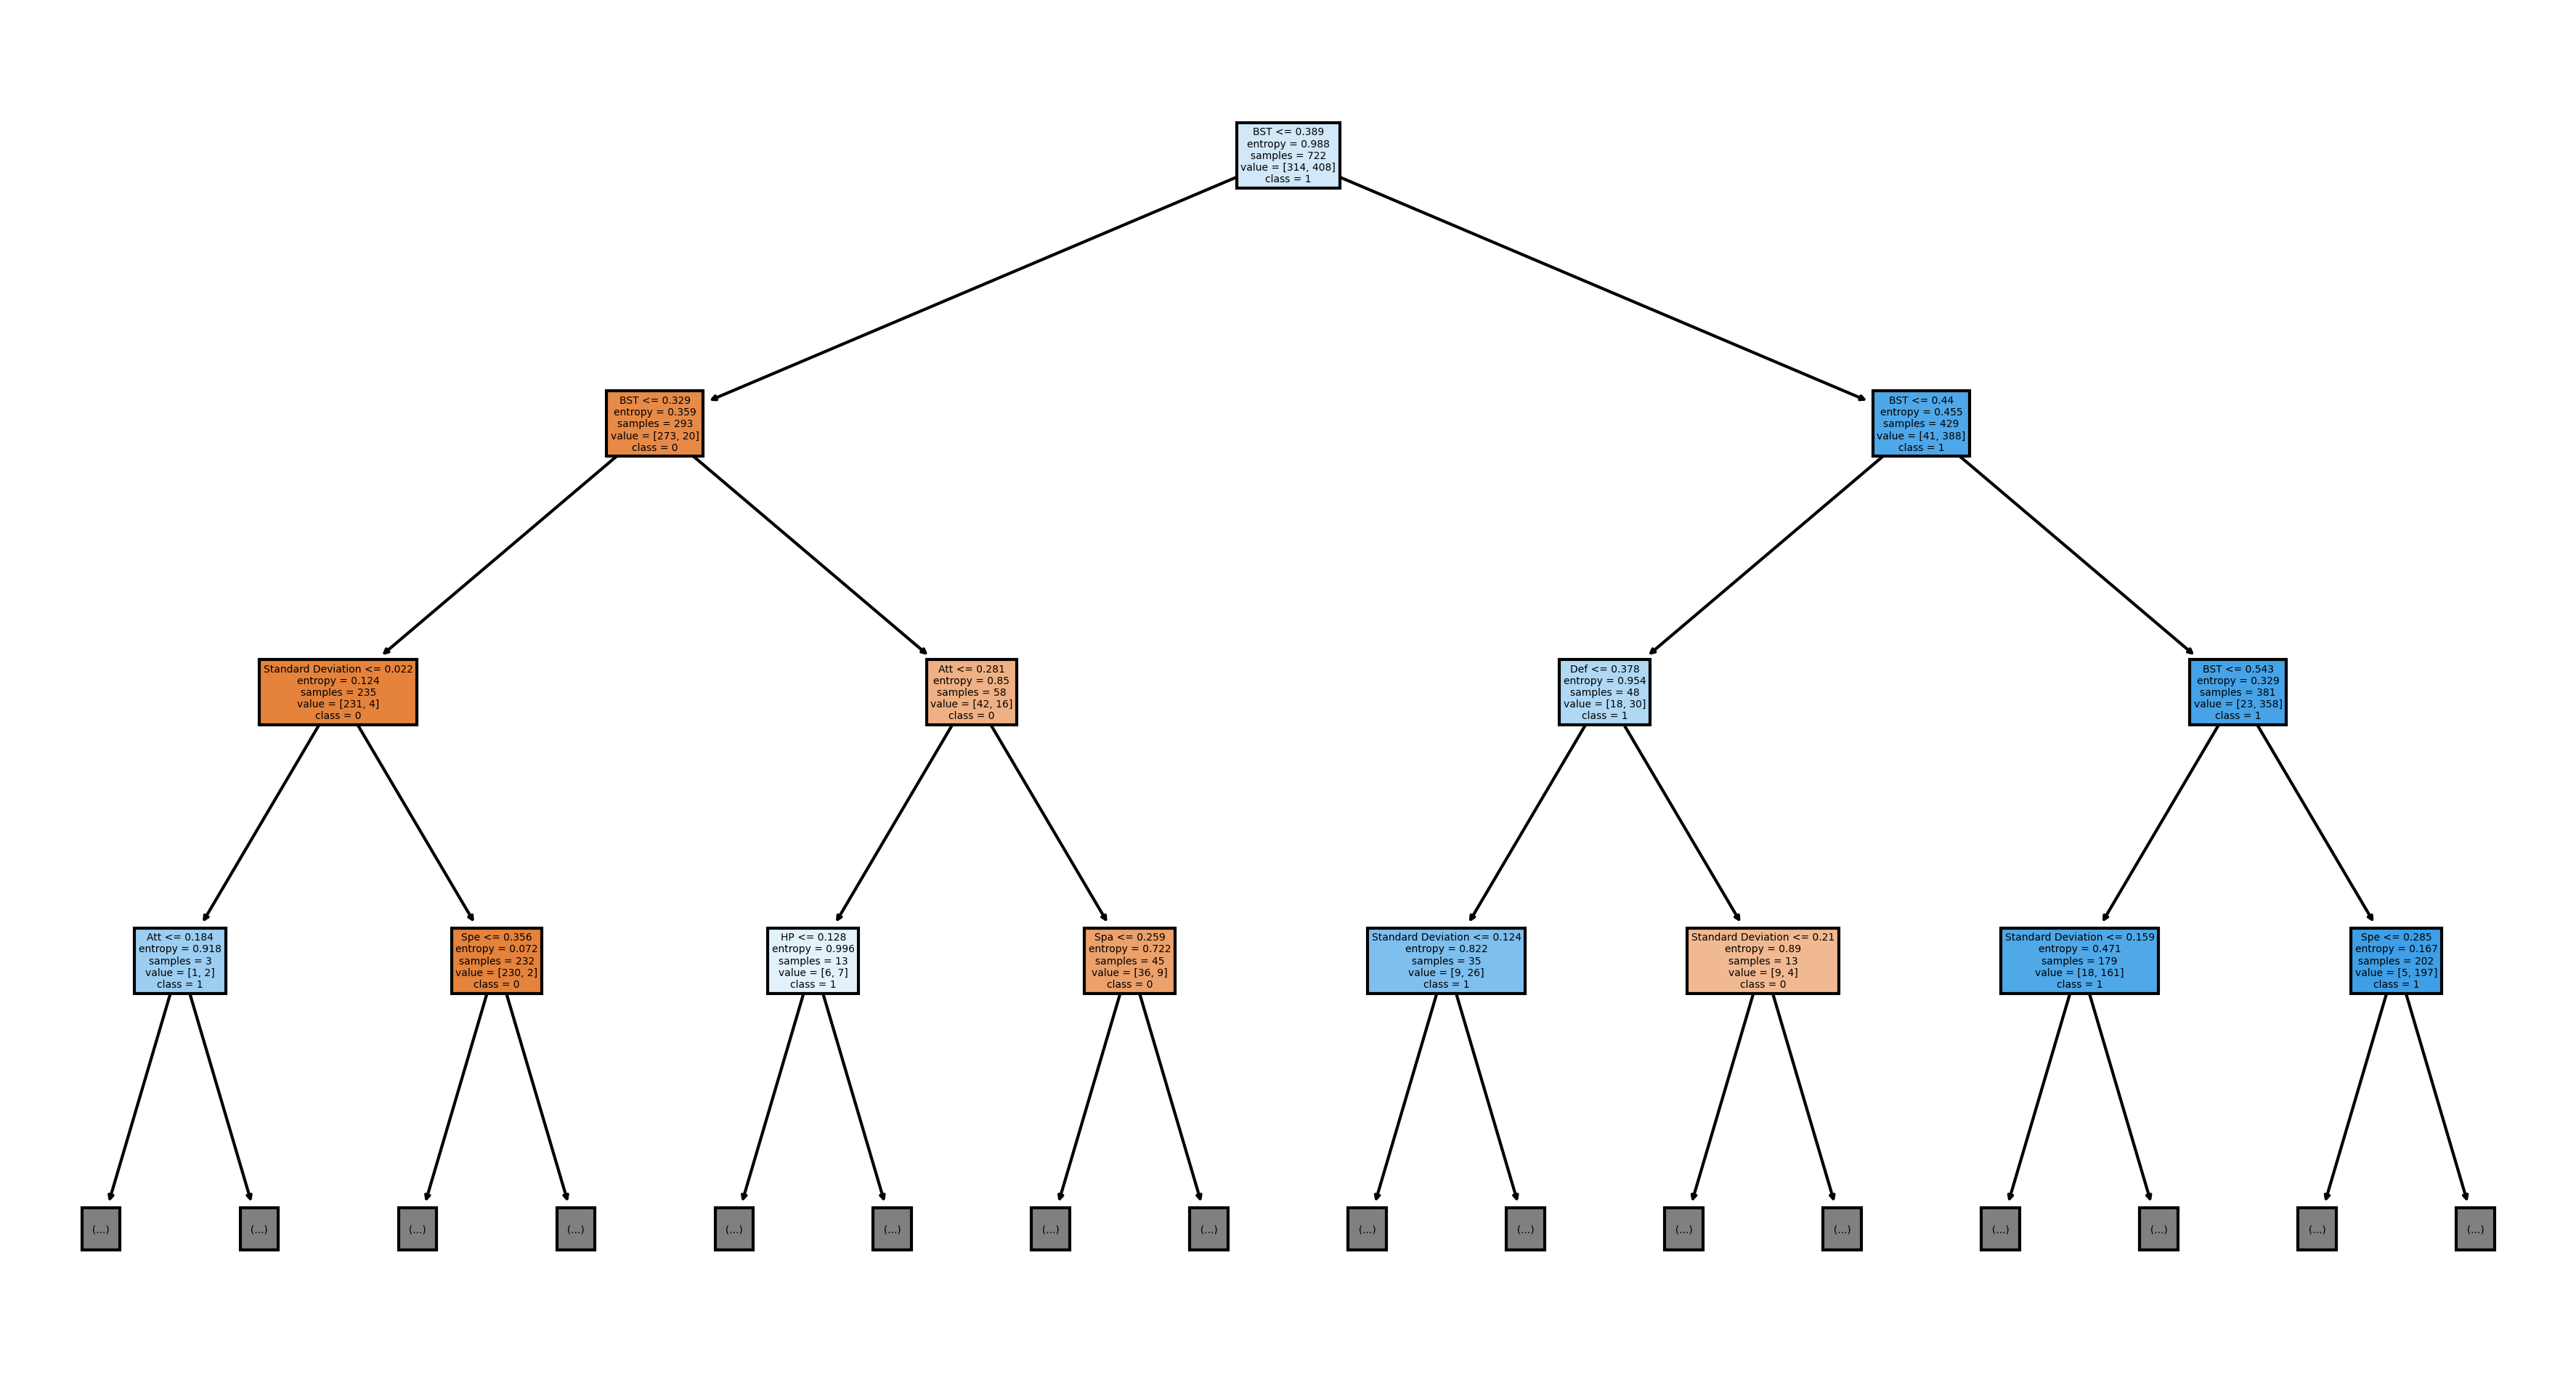

In [ ]:
#Plotting Decision Tree for MinMax Scaler-Stratified Split
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=['0','1'],
               filled = True, max_depth = 3);

In [ ]:
#Storing Scores
model_accuracy['model'].append('DecisionTree-MinMmax-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('DecisionTree-MinMmax-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('DecisionTree-MinMmax-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('DecisionTree-MinMmax-Stratified')
model_f1['f1'].append(f1_score)

In [ ]:
#Decision Tree for Standard Scaler-Stratified Split with accuracy, precision, recall & f1 score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train_scaled_standard_strafied, y_train_2)
y_pred = clf.predict(x_test_scaled_standard_strafied)

score=accuracy_score(y_pred, y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['DecisionTree-Standard-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.877
Precision accuracy: 0.905
Recall accuracy: 0.874
f-1 score: 0.890


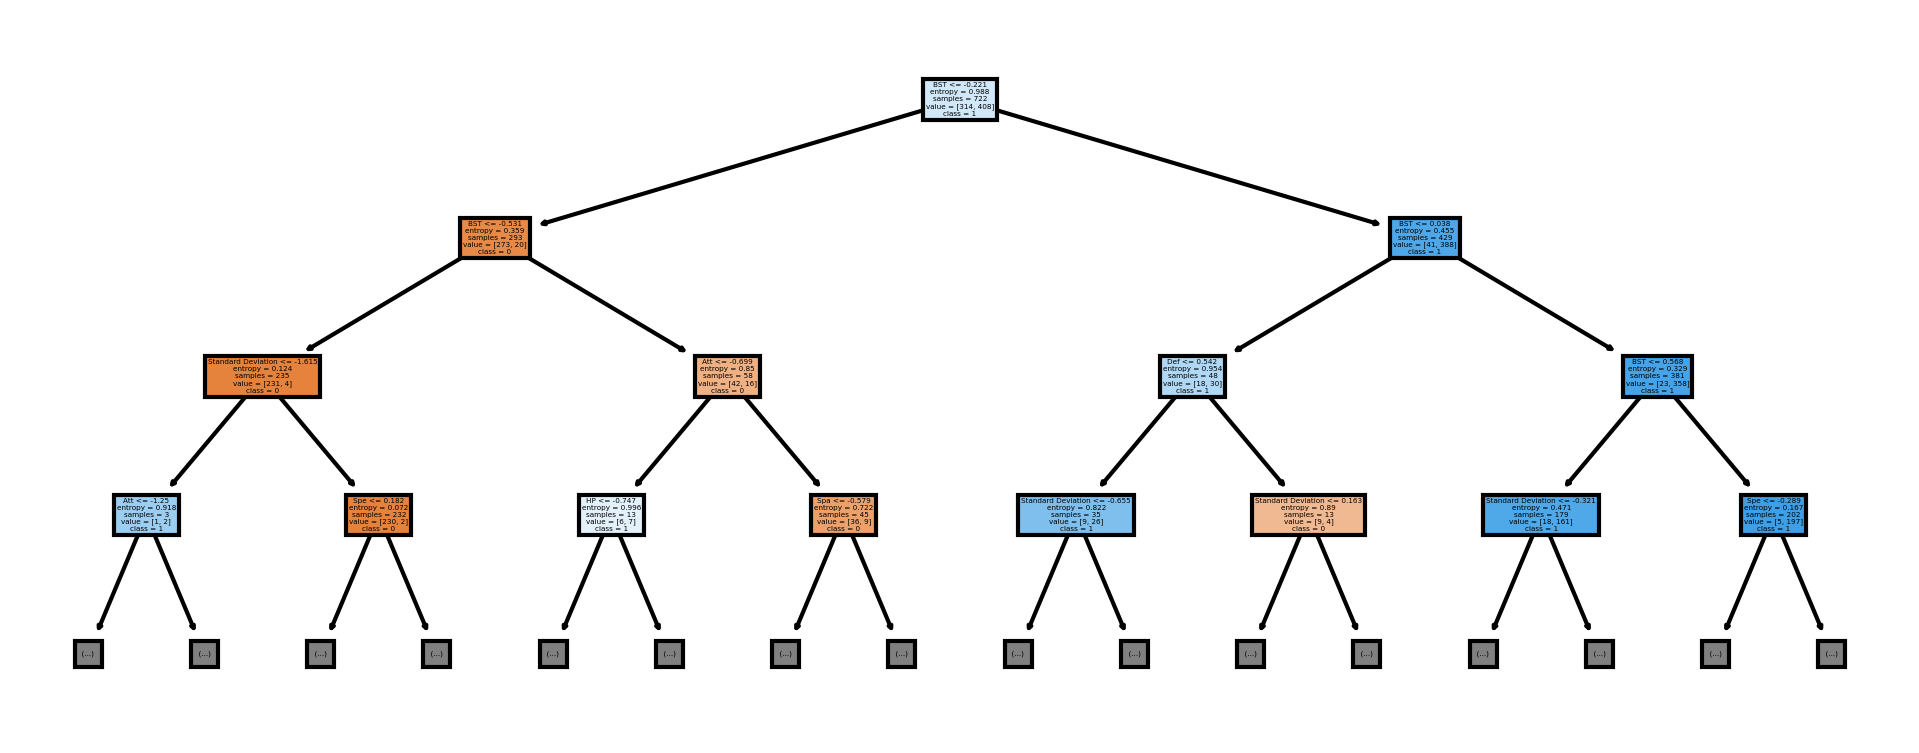

In [ ]:
#Plotting Decision Tree for Standard Scaler-Stratified Split
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=300)
tree.plot_tree(clf,
               feature_names = x.columns, 
               class_names=['0','1'],
               filled = True, max_depth = 3);

In [ ]:
#Storing Scores
model_accuracy['model'].append('DecisionTree-Standard-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('DecisionTree-Standard-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('DecisionTree-Standard-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('DecisionTree-Standard-Stratified')
model_f1['f1'].append(f1_score)

In [ ]:
#SVM for MinMax Scaler-Random Split with accuracy, precision, recall & f1 score
Classifier = SVC(kernel="linear")
Classifier.fit(x_train_scaled_minmax_random, y_train_1)
y_pred = Classifier.predict(x_test_scaled_minmax_random)

score = accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['SVM-MinMmax-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.916
Precision accuracy: 0.892
Recall accuracy: 0.965
f-1 score: 0.927


In [ ]:
#Storing Scores
model_accuracy['model'].append('SVM-MinMmax-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('SVM-MinMmax-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('SVM-MinMmax-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('SVM-MinMmax-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#SVM for Standard Scaler-Random Split with accuracy, precision, recall & f1 score
Classifier = SVC(kernel="linear")
Classifier.fit(x_train_scaled_standard_random, y_train_1)
y_pred = Classifier.predict(x_test_scaled_standard_random)

score = accuracy_score(y_pred,y_test_1)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['SVM-Standard-Random'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.919
Precision accuracy: 0.911
Recall accuracy: 0.948
f-1 score: 0.929


In [ ]:
#Storing Scores
model_accuracy['model'].append('SVM-Standard-Random')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('SVM-Standard-Random')
model_precision['precision'].append(precision)

model_recall['model'].append('SVM-Standard-Random')
model_recall['recall'].append(recall)

model_f1['model'].append('SVM-Standard-Random')
model_f1['f1'].append(f1_score)

In [ ]:
#SVM for MinMax Scaler-Stratified Split with accuracy, precision, recall & f1 score
Classifier = SVC(kernel="linear")
Classifier.fit(x_train_scaled_minmax_strafied, y_train_2)
y_pred = Classifier.predict(x_test_scaled_minmax_strafied)

score = accuracy_score(y_pred,y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['SVM-MinMmax-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.906
Precision accuracy: 0.892
Recall accuracy: 0.949
f-1 score: 0.920


In [ ]:
#Storing Scores
model_accuracy['model'].append('SVM-MinMmax-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('SVM-MinMmax-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('SVM-MinMmax-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('SVM-MinMmax-Stratified')
model_f1['f1'].append(f1_score)

In [ ]:
#SVM for Standard Scaler-Stratified Split with accuracy, precision, recall & f1 score
Classifier = SVC(kernel="linear")
Classifier.fit(x_train_scaled_standard_strafied, y_train_2)
y_pred = Classifier.predict(x_test_scaled_standard_strafied)

score = accuracy_score(y_pred, y_test_2)
precision = precision_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)

#storing target prediction values
prediction_y['SVM-Standard-Stratified'] = y_pred

print("Test set accuracy: {:.3f}".format(score))
print("Precision accuracy: {:.3f}".format(precision))
print("Recall accuracy: {:.3f}".format(recall))
print("f-1 score: {:.3f}".format(f1_score))

Test set accuracy: 0.919
Precision accuracy: 0.912
Recall accuracy: 0.949
f-1 score: 0.930


In [ ]:
#Storing Scores
model_accuracy['model'].append('SVM-Standard-Stratified')
model_accuracy['accuracy'].append(score)

model_precision['model'].append('SVM-Standard-Stratified')
model_precision['precision'].append(precision)

model_recall['model'].append('SVM-Standard-Stratified')
model_recall['recall'].append(recall)

model_f1['model'].append('SVM-Standard-Stratified')
model_f1['f1'].append(f1_score)

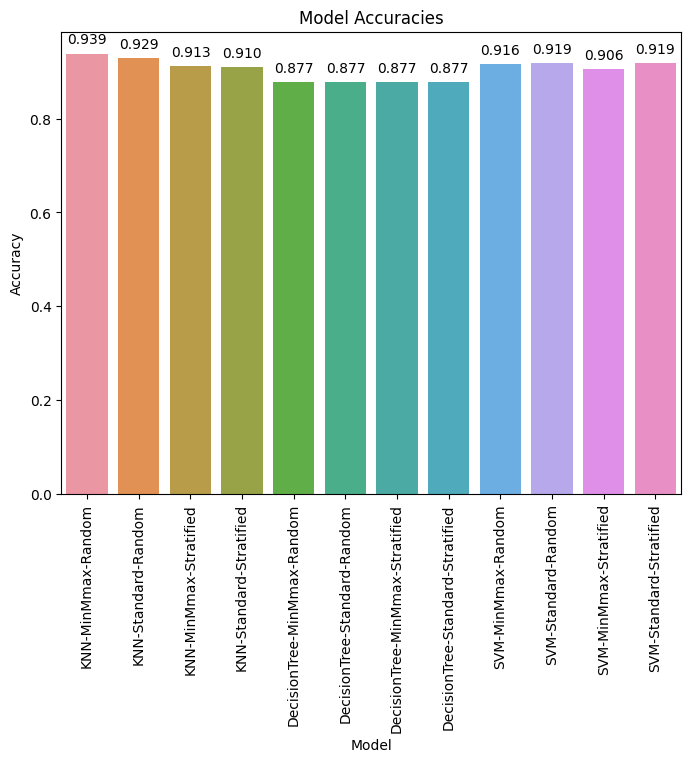

In [ ]:
#Accuracy Bar Chart
ac = pd.DataFrame(model_accuracy)

plt.figure(figsize=(8,6))

plot = sns.barplot(x='model', y='accuracy', data=ac)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# add y labels to bars
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#Rotate x labels
plt.xticks(rotation=90)

plt.show()

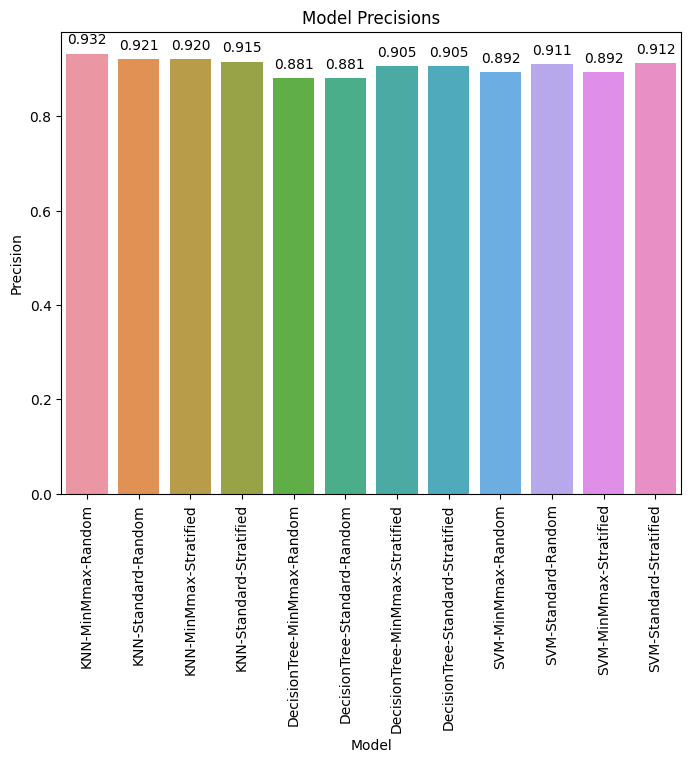

In [ ]:
#Precision Bar Chart
pr = pd.DataFrame(model_precision)

plt.figure(figsize=(8,6))

plot = sns.barplot(x='model', y='precision', data=pr)

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precisions')

# add y labels to bars
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#Rotate x labels
plt.xticks(rotation=90)

plt.show()

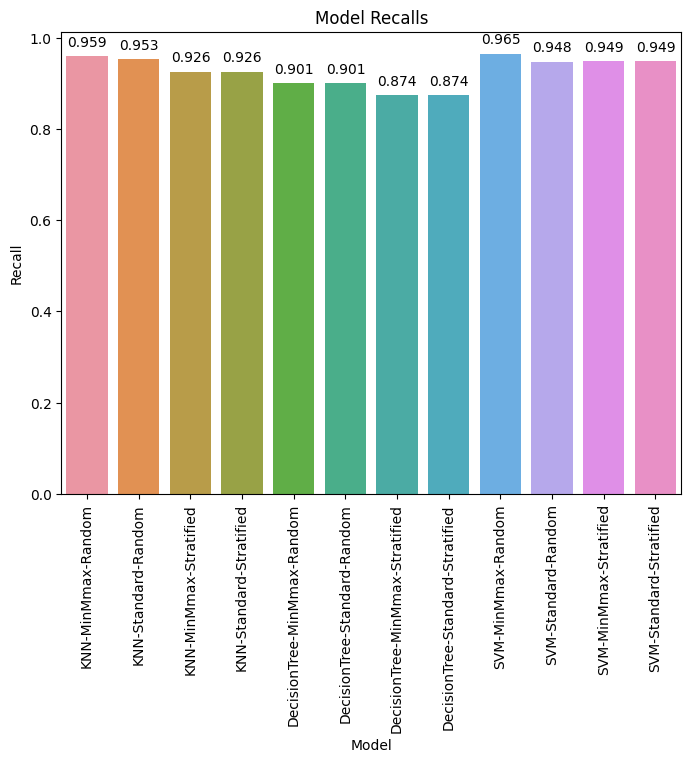

In [ ]:
#Recall Bar Chart
re = pd.DataFrame(model_recall)

plt.figure(figsize=(8,6))

plot = sns.barplot(x='model', y='recall', data=re)

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recalls')

# add y labels to bars
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#Rotate x labels
plt.xticks(rotation=90)

plt.show()

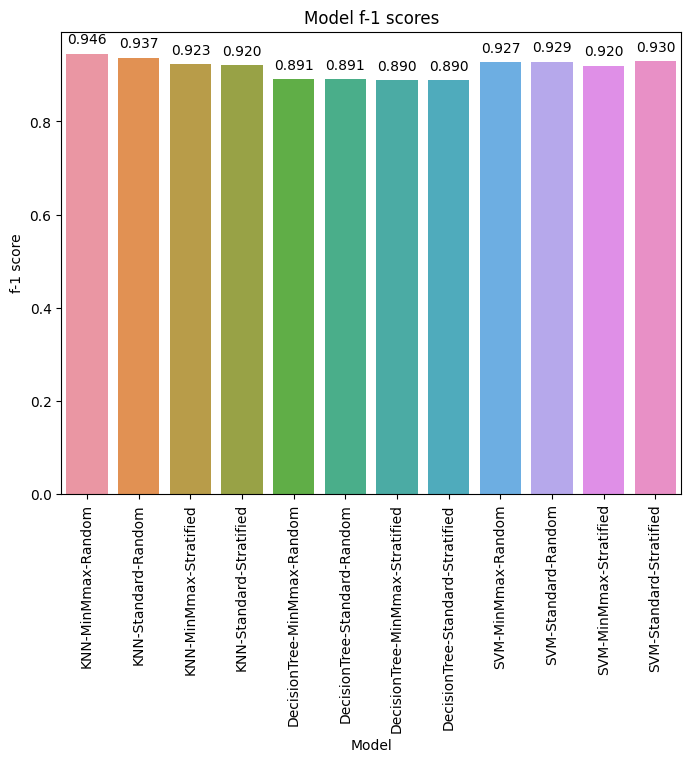

In [ ]:
#f-1 Bar Chart
f = pd.DataFrame(model_f1)

plt.figure(figsize=(8,6))

plot = sns.barplot(x='model', y='f1', data=f)

plt.xlabel('Model')
plt.ylabel('f-1 score')
plt.title('Model f-1 scores')

# add y labels to bars
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#Rotate x labels
plt.xticks(rotation=90)

plt.show()

<Axes: >

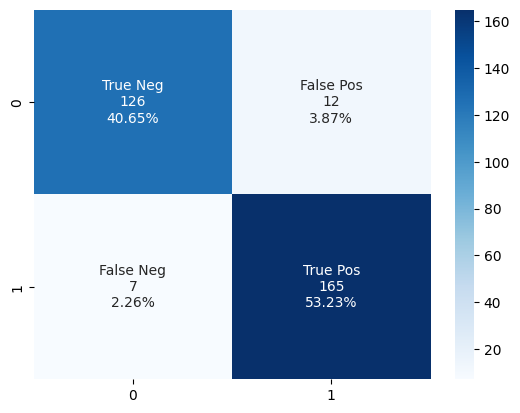

In [ ]:
#Confusion Matrix for KNN-MinMax-Random
conf_mat = confusion_matrix(y_test_1, prediction_y['KNN-MinMmax-Random'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')

<Axes: >

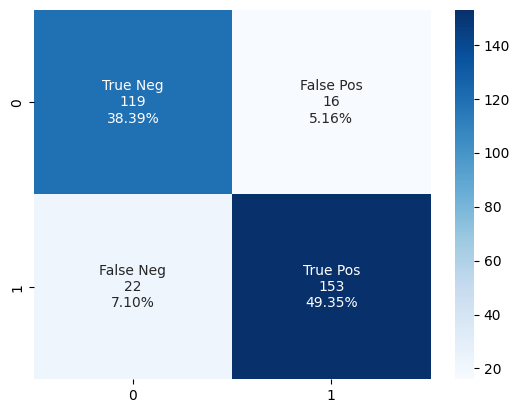

In [ ]:
#Confusion Matrix for DecisionTree-Standard-Stratified
conf_mat = confusion_matrix(y_test_2, prediction_y['DecisionTree-Standard-Stratified'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')

<Axes: >

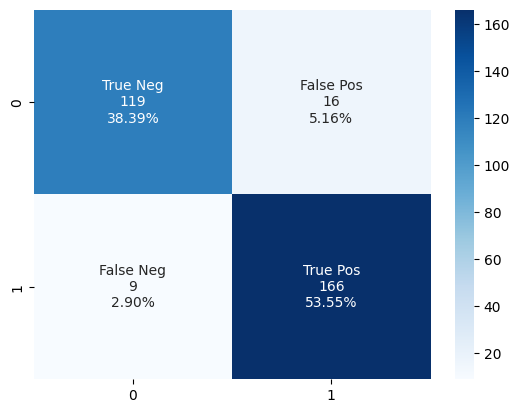

In [ ]:
#Confusion Matrix for SVM-Standard-Stratified
conf_mat = confusion_matrix(y_test_2, prediction_y['SVM-Standard-Stratified'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')